<a href="https://colab.research.google.com/github/ManuelAbril2001/Big-Data/blob/main/Modelo_Predictivo_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRERIAS VARIAS
from google.colab import drive
drive.mount('/content/drive')

from __future__ import print_function
import numpy as np
import pandas as pd

import tensorflow as tf
import keras as Ke
from keras.models import Sequential
from keras.layers import Dense , Activation #, Dropout
from keras.optimizers import SGD #stochastic gradient descent
from keras.utils import np_utils
#np.random.seed(100)
#%%
# DATA
from sklearn import datasets


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# abro el excel
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Parcial_2023.xlsx")


In [ ]:

# filtro por X1 < -3 y > 3 afuera. Esta línea de código elimina todas las filas en la columna X1 que son menores que -3 o mayores que 3 en el DataFrame 'data'.
data = data[~(data.X2<-3) & ~(data.X2>3)]

#%% eligo las variables observadas y target, pasandolas a formato numpy. Aquí se seleccionan las
#columnas X1 y X2 como variables observadas, y la columna Z como variable objetivo en el DataFrame 'data', y se convierten en matrices numpy.
#X será una matriz 2D con N filas y 2 columnas,
#y será una matriz 1D con N elementos.
X = data[['X1','X2']].to_numpy()
y = data['Z'].to_numpy()

#Esta línea de código obtiene las dimensiones de la matriz X y las almacena en las variables Nr y Nc
(Nr,Nc)=np.shape(X)

#crea una copia de la matriz X, que se utilizará para normalizar los datos.
Xn = X.copy()

scale_max = []
scale_max = [max(abs(X[:,j])) for j in range(Nc)] # arma la lista POR COMPRENSION NO CONJUNTO {1,2,3,4}. Estoy sacando el maximo del valor absoluto de la columna J

scale_min = []
scale_min = [min(abs(X[:,j])) for j in range(Nc)] # arma la lista, la va llenando

#%%
#scales=[]
#for j in range(Nc):
#    scales.append(max(abs(X[:,j])))
#%%
# preprocessing minmax. La normalización se realiza para cada columna j en un bucle for, dividiendo la columna j de la matriz X por la diferencia entre el valor máximo y mínimo de esa columna, y luego restando el valor mínimo de esa columna.
#La normalización de datos es un proceso que se utiliza para ajustar los valores de una variable para que estén en un rango común y comparable
#Por ejemplo, si los valores de la columna j de X tienen un rango de 0 a 100, la normalización ajustará los valores de esa columna para que estén en un rango de 0 a 1. Esto es útil en muchas aplicaciones de aprendizaje automático, ya que algunas técnicas de análisis y modelado requieren que las variables tengan el mismo rango de valores.
#la normalización se realiza para cada columna de la matriz X para ajustar los valores a un rango común y comparable.
for j in range(Nc):
    Xn[:,j]=(X[:,j]-scale_min[j])/(scale_max[j]-scale_min[j])

#%%

NB_EPOCHS=3000 #tiempo de resolucion es una variable que se utiliza para definir el número de épocas o iteraciones
BATCH_SIZE = 50 #número de muestras de datos que se usarán en cada iteración durante el entrenamiento
#cantidad de datos del testeo, esto es lo que cambiamos valores entre 300 y 700 y analizamos q pasa

VERBOSE = 1 #variable que se utiliza para definir el nivel de detalle 0 apagada 1 muestra 2 mucho detalle
NB_CLASSES = 3 #cantidad de neuronas de salida queremos
OPTIMIZER = SGD() #SGD es un optimizador llamado Descenso de Gradiente Estocástico (en inglés, Stochastic Gradient Descent).


# son variables que se utilizan en el aprendizaje automático para definir el número de neuronas en las capas ocultas de un modelo de red neuronal.

#En una red neuronal, las capas ocultas son capas intermedias entre la capa de entrada y la capa de salida
#Por ejemplo, si N_HIDDEN_1 se establece en 4 y N_HIDDEN_2 se establece en 2, el modelo tendrá dos capas ocultas con 4 y 2 neuronas, respectivamente.
N_HIDDEN_1 = 4
N_HIDDEN_2 = 2
VALIDATION_SPLIT= 0.2 #define el porcentaje de datos que se usan como conjunto de validación durante el entrenamiento de un modelo.
#%%stra

train = np.random.randint(0,150,120) #contiene 120 números enteros aleatorios entre 0 y 149. Estos números representan los índices de las muestras que se utilizarán como datos de entrenamiento.
test = np.array(list(set(range(150))-set(train)))
#Genera dos conjuntos de datos aleatorios
#train y test a partir de un conjunto de datos original que contiene 150 muestras,
#donde train contiene 120 muestras
#test 30 muestras restantes.
print('Datos de training: ',str(len(set(train))))
print('Datos de testing: ',str(len(set(test))))

#%%
#La matriz de características se selecciona a partir de la matriz original Xn utilizando los índices de las muestras en el conjunto de entrenamiento
Xtrain = Xn[train,]
intermedio = y[train]
#ytrain es una versión codificada en caliente de las etiquetas de clase en el conjunto de entrenamiento train. La codificación en caliente es un proceso que convierte las etiquetas de clase en una matriz binaria, donde cada fila representa una muestra y cada columna representa una clase, y los valores de las celdas son 1 si la muestra pertenece a esa clase y 0 en caso contrario
ytrain = np_utils.to_categorical(y[train],num_classes= NB_CLASSES)
#Es una matriz que utiliza para evaluar el rendimiento del modelo en datos de prueba. La matriz de características se selecciona a partir de la matriz original Xn utilizando los índices de las muestras en el conjunto de prueba test
Xtest= Xn[test,]
#Esta línea de código se utiliza para convertir las etiquetas de clase en el conjunto de datos de prueba en una matriz binaria, donde cada fila representa una muestra y cada columna representa una clase. La matriz binaria resultante se utiliza como entrada para evaluar el rendimiento del modelo en los datos de prueba
ytest = np_utils.to_categorical(y[test],num_classes= NB_CLASSES)
#el arreglo de etiquetas de clase y[test] y el número total de clases NB_CLASSES. La función convierte cada etiqueta de clase en y[test] en un vector binario de longitud NB_CLASSES, donde todos los elementos son cero, excepto el índice correspondiente a la clase de la etiqueta, que es uno.
#%% ARMADO DE RED

model = Ke.models.Sequential() #sequantial es un constructor
model.add(Dense(N_HIDDEN_1,name='HIDDEN1', input_shape=(Nc,))) #se le agrega una capa oculta con el metodo add
model.add(Activation('relu')) #Relu es la funcion de activacion
#model.add(Dense(N_HIDDEN_2,name='HIDDEN2'))
#model.add(Activation('relu'))

model.add(Dense(NB_CLASSES,name='OUTPUT'))# agrega una capa de salida al modelo. Esta capa es completamente conectada y tiene NB_CLASSES neuronas
model.add(Activation('sigmoid')) #especifica la función de activación que se aplicará a las salidas de la capa de salida. En este caso, la función de activación es sigmoidal.
model.summary()#resumen del modelo
'mse'
model.compile(optimizer= OPTIMIZER, loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(Xtrain,ytrain,
                    verbose=VERBOSE,validation_split=VALIDATION_SPLIT,
                    epochs=NB_EPOCHS,batch_size=BATCH_SIZE)
#Esta función entrena el modelo en los datos de entrenamiento especificados por Xtrain y ytrain. Agrega los parametros que le pasamos arriba

#%%
score = model.evaluate(Xtest,ytest,verbose=VERBOSE) #evalúa el rendimiento del modelo utilizando los datos de prueba. Esta función devuelve la pérdida y la métrica de precisión para los datos de prueba
print(score)#imprime la pérdida y la precisión del modelo en los datos de prueba.

Streaming output truncated to the last 5000 lines.
Epoch 502/3000
2/2 [==============================] - 0s 64ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 503/3000
2/2 [==============================] - 0s 42ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 504/3000
2/2 [==============================] - 0s 45ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 505/3000
2/2 [==============================] - 0s 41ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 506/3000
2/2 [==============================] - 0s 57ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 507/3000
2/2 [==============================] - 0s 45ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 508/3000
2/2 [==============================] - 0s 39ms/step - loss: 0.0219 - accurac

IndexError: ignored

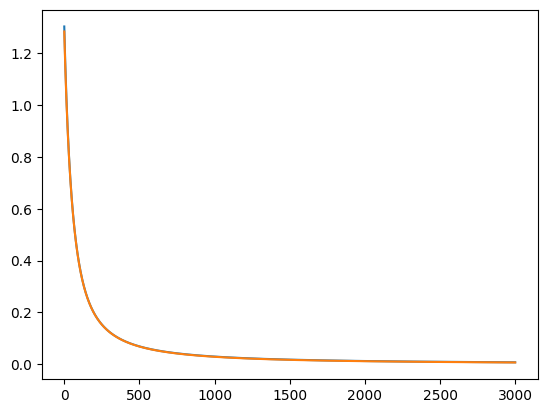

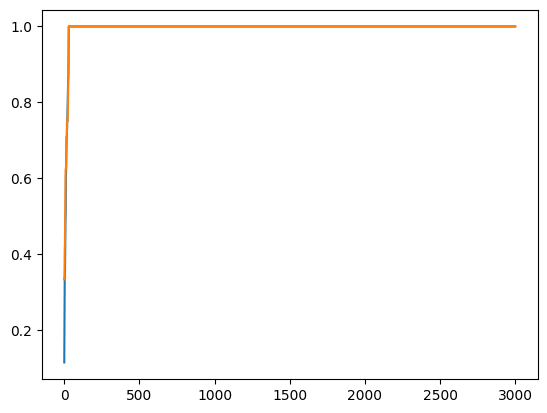

In [ ]:
import copy as copy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib import pyplot
from math import cos, sin, atan
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
#%%
#son los weights y b los bias
aux = model.weights
M1  = np.matrix(aux[0])
b1  = np.matrix(aux[1])

M2 = np.matrix(aux[2])
b2 =np.matrix(aux[3])

M3 = np.matrix(aux[4])
b3 = np.matrix(aux[5])
#%%
import math
def RELU(matriz):
    Nr,Nc= np.shape(matriz)
    out = matriz*0
    for j in range(Nr):
        for k in range(Nc):
            out[j,k]=max(0,matriz[j,k])
    return(out)

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

#%%
# Dominio
X = np.arange(-6,6,0.05)
Y = X

xx,yy= np.meshgrid(X,Y)

NrowD=len(X)*len(Y)

D=np.zeros(shape=(NrowD,2))

i = -1
for x in X:
    for y in Y:
        i+=1
        D[i,0] =x
        D[i,1] =y


P1 = np.matmul(D,M1) +b1
last = RELU(P1)

P2 = np.matmul(last,M2) +b2
last = RELU(P2)


P3 = np.matmul(last,M3) +b3
last = np.array([sigmoid(x) for x in P3])


zz=xx*0
j = -1
for i in range(len(X)):
    for k in range(len(Y)):
        j+=1
        zz[i,k] = last[j]


#%%
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(45, 45)

plt.show()

#%%
excel = pd.DataFrame(aux).T

M1 = pd.DataFrame(M1)
M1.to_excel('M1.xlsx')

b1 = pd.DataFrame(b1)
b1.to_excel('b1.xlsx')

M2 = pd.DataFrame(M2)
M2.to_excel('M2.xlsx')

b2 = pd.DataFrame(b2)
b2.to_excel('b2.xlsx')

M3 = pd.DataFrame(M3)
M3.to_excel('M3.xlsx')

b3 = pd.DataFrame(b3)
b3.to_excel('b3.xlsx')







GRAFICADOR